In [1]:
from src.CipherBreaker import CipherBreaker
from src.CipherUtils import (
    TextDecoder,
    TextEncoder,
    CipherGenerator,
    TextPreProcessor,
)
from src.ProbabilityMatrix import ProbabilityMatrix

In [2]:
# create instances of my beautiful classes

cipher_generator = CipherGenerator()
preprocess = TextPreProcessor()
text_encoder = TextEncoder()
text_decoder = TextDecoder()

In [3]:
# List of text file paths to build our corpus (where we learn the transitions probs)

file_paths = [
    "texts/moby_dick.txt",
    "texts/shakespeare.txt",
    "texts/james-joyce-a-portrait-of-the-artist-as-a-young-man.txt",
    "texts/james-joyce-dubliners.txt",
    "texts/james-joyce-ulysses.txt",
]

texts = []
for file_path in file_paths:
    with open(file_path, "r") as file:
        texts.append(file.read())

corpus = "".join(texts)

In [4]:
# preprocess the text, removing extra-characters

corpus = preprocess.lower(corpus)
unknown_chars = preprocess.unknown_chars(corpus)
# print(unknown_chars)
corpus = preprocess.remove_unknown_chars(corpus, unknown_chars=unknown_chars)
corpus = preprocess.remove_additional_spaces(corpus)

preprocess.save_text(
    corpus
)  # save text after preprocessing inside text_preprocessed.txt

In [5]:
# compute the transition probs

probability_matrix = ProbabilityMatrix(corpus)
probability_matrix.compute_probability_table()

In [6]:
min(probability_matrix.probability_table.values())

1.2227497980017334e-07

In [7]:
probability_matrix.save_all_2_chars()
probability_matrix.save_probability_table()

In [8]:
# some text to try

text = "There were better sense in the sad mechanic exercise of determining the reason of its absence where it is not. In the novels of the last hundred years there are vast numbers of young ladies with whom it might be a pleasure to fall in love; there are at least five with whom, as it seems to me, no man of taste and spirit can help doing so."
# text = "I do not believe a word of it, my dear. If he had been so very agreeable, he would have talked to Mrs. Long. But I can guess how it was"
# text = "Your plan is a good one,” replied Elizabeth, “where nothing is in question but the desire of being well married; and if I were determined to get a rich husband, or any husband, I dare say I should adopt it. But these are not Jane’s feelings"
# text = "she is not acting by design. As yet she cannot even be certain of the degree of her own regard, nor of its reasonableness. She has known him only a fortnight. She danced four dances with him at Meryton; she saw him one morning at his own house, and has since dined in company with him four times."

In [9]:
# encode and decode a sample text with a generated cipher

text = preprocess.lower(text)
text = preprocess.remove_unknown_chars(
    text, unknown_chars=preprocess.unknown_chars(text)
)
text = preprocess.remove_additional_spaces(text)


cipher = cipher_generator.generate_cipher()

encoded_text = text_encoder.encode_text(text, cipher)
decoded_text = text_decoder.decode_text(encoded_text, cipher)

print("Original Text:", text)
print("Encoded Text:", encoded_text)
print("Decoded Text:", decoded_text)

Original Text: there were better sense in the sad mechanic exercise of determining the reason of its absence where it is not in the novels of the last hundred years there are vast numbers of young ladies with whom it might be a pleasure to fall in love there are at least five with whom as it seems to me no man of taste and spirit can help doing so
Encoded Text: ftses nses usffse kspks dp fts koz msrtopdr sgserdks ij zsfsemdpdpx fts esokip ij dfk ouksprs ntses df dk pif dp fts pibsvk ij fts vokf tcpzesz hsoek ftses oes bokf pcmusek ij hicpx vozdsk ndft ntim df mdxtf us o lvsokces fi jovv dp vibs ftses oes of vsokf jdbs ndft ntim ok df kssmk fi ms pi mop ij fokfs opz kldedf rop tsvl zidpx ki
Decoded Text: there were better sense in the sad mechanic exercise of determining the reason of its absence where it is not in the novels of the last hundred years there are vast numbers of young ladies with whom it might be a pleasure to fall in love there are at least five with whom as it seems to 

In [10]:
# break the cipher with MCMC

cipher_breaker = CipherBreaker(
    starting_cipher=cipher_generator.generate_cipher(),
    ciphered_text=encoded_text,
    probability_table=probability_matrix.probability_table,
)

cipher_breaker.break_cipher(iterations=100000, print_interval=100)

Iter 0: eibzb tbzb xbeebz hbuhb qu eib hmp lbvimuqv babzvqhb dk pbebzlququg eib zbmhdu dk qeh mxhbuvb tibzb qe qh ude qu eib udobnh dk eib nmhe iyupzbp cbmzh eibzb mzb omhe uylxbzh dk cdyug nmpqbh tqei tidl qe lqgie xb m snbmhyzb ed kmnn qu ndob eibzb mzb me nbmhe kqob tqei tidl mh qe hbblh ed lb ud lmu dk emheb mup hsqzqe vmu ibns pdqug hd
Iter 100: there cere better sense an the sid meyhinay ekeryase of determanang the reison of ats ibsenye chere at as not an the novels of the list hundred weirs there ire vist numbers of woung lidaes cath chom at maght be i pleisure to fill an love there ire it leist fave cath chom is at seems to me no min of tiste ind sparat yin help doang so
Iter 200: there were better sense in the sad mechanic ekercise of determining the reason of its absence where it is not in the novels of the last hundred years there are vast numbers of young ladies with whom it might be a pleasure to fall in love there are at least five with whom as it seems to me no man of ta

['o',
 'u',
 'r',
 'z',
 's',
 'j',
 'x',
 't',
 'd',
 'q',
 'y',
 'v',
 'm',
 'p',
 'i',
 'l',
 'g',
 'e',
 'k',
 'f',
 'c',
 'b',
 'n',
 'a',
 'h',
 'w']

In [11]:
cipher_breaker.extract_best(
    n_extract=10, return_likelihood=True
)  # Extract the best 10 decoded messages along with their likelihood

[('there were better sense in the sad mechanic ekercise of determining the reason of its absence where it is not in the novels of the last hundred years there are vast numbers of young ladies with whom it might be a pleasure to fall in love there are at least five with whom as it seems to me no man of taste and spirit can help doing so',
  -1660.4788802172998),
 ('there were yetter sense in the sad mechanic ekercise of determining the reason of its aysence where it is not in the novels of the last hundred bears there are vast numyers of boung ladies with whom it might ye a pleasure to fall in love there are at least five with whom as it seems to me no man of taste and spirit can help doing so',
  -1660.7744786856956),
 ('there were better sense in the sad mechanic eqercise of determining the reason of its absence where it is not in the novels of the last hundred years there are vast numbers of young ladies with whom it might be a pleasure to fall in love there are at least five with wh

MovieWriter imagemagick unavailable; using Pillow instead.


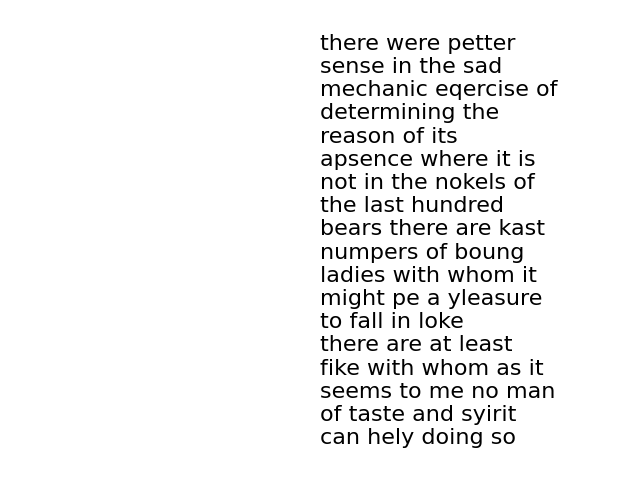

In [13]:
cipher_breaker.generate_animation(filename="there were.gif")